# Fusion ART

Esse modelo extrende as capacidades do ARTMAP, possibilitando o processamento de valores reais.

## Importando bibliotecas e baixando base de dados

In [ ]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from artlib import FusionART
from sklearn.metrics import accuracy_score
import pandas as pd

X, y = make_circles(random_state=43, n_samples=2_000, factor=0.3, noise=0.08)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

## Testando o modelo

In [ ]:
alphas = [0.0, 1e-3, 1e-2, 1e-1, 1.0, 10.0] 
rhos   = [0.1, 0.3, 0.5, 0.7, 0.9]
betas  = [1.0, 0.5, 0.1]

results = []

for alpha in alphas:
    for rho in rhos:
        for beta in betas:

            model = FusionART(rho=rho, alpha=alpha, beta=beta)
            
            lower_bound, upper_bound = (model.module_a).find_data_bounds(X)
            model.module_a.set_data_bounds(lower_bound, upper_bound)

            # Preparar os dados (normalizados internamente pelo modelo)
            train_X_prep = model.prepare_data(X_train)
            test_X_prep  = model.prepare_data(X_test)

            # Treinar
            model.fit(train_X_prep, y_train)

            # Prever
            predictions = model.predict(test_X_prep)

            # Calcular accuracy
            acc = accuracy_score(y_test, predictions)

            results.append({
                'alpha': alpha,
                'rho': rho,
                'beta': beta,
                'accuracy': acc
            })


df_results = pd.DataFrame(results)
worst_results = df_results.sort_values(by='accuracy', ascending=True).head(10)
best_results = df_results.sort_values(by='accuracy', ascending=True).tail(10)


In [ ]:
print("Melhores resultados:")
print(best_results)
print("Piores resultados:")
print(worst_results)

Melhores resultados:
    alpha  rho  beta  accuracy
88  10.00  0.9   0.5       1.0
45   0.10  0.1   1.0       1.0
46   0.10  0.1   0.5       1.0
48   0.10  0.3   1.0       1.0
49   0.10  0.3   0.5       1.0
51   0.10  0.5   1.0       1.0
52   0.10  0.5   0.5       1.0
54   0.10  0.7   1.0       1.0
30   0.01  0.1   1.0       1.0
89  10.00  0.9   0.1       1.0
Piores resultados:
    alpha  rho  beta  accuracy
63  1.000  0.3   1.0   0.98375
60  1.000  0.1   1.0   0.98375
23  0.001  0.5   0.1   0.98375
8   0.000  0.5   0.1   0.98375
66  1.000  0.5   1.0   0.98375
20  0.001  0.3   0.1   0.98500
38  0.010  0.5   0.1   0.98500
2   0.000  0.1   0.1   0.98500
17  0.001  0.1   0.1   0.98500
5   0.000  0.3   0.1   0.98500


## Gráficos dos piores resultados

Todas as combinações de atributos aparentam ter resultados muito bons. Para ter uma visão mais geral do modelo, vamos ver quais foram os piores resultados.

0.98375


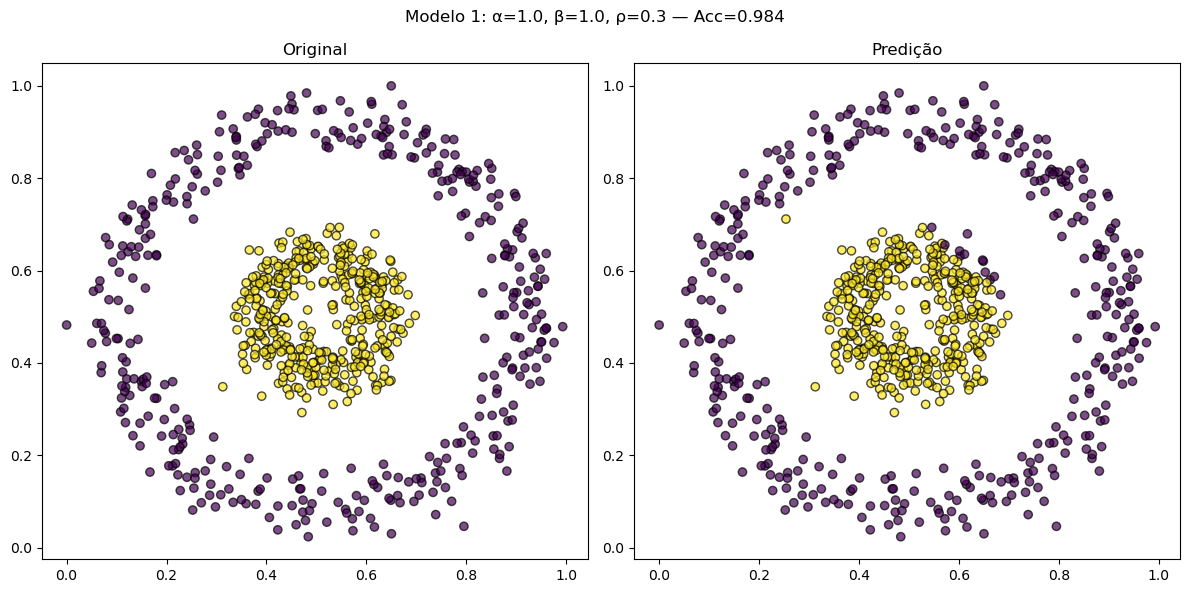

0.98375


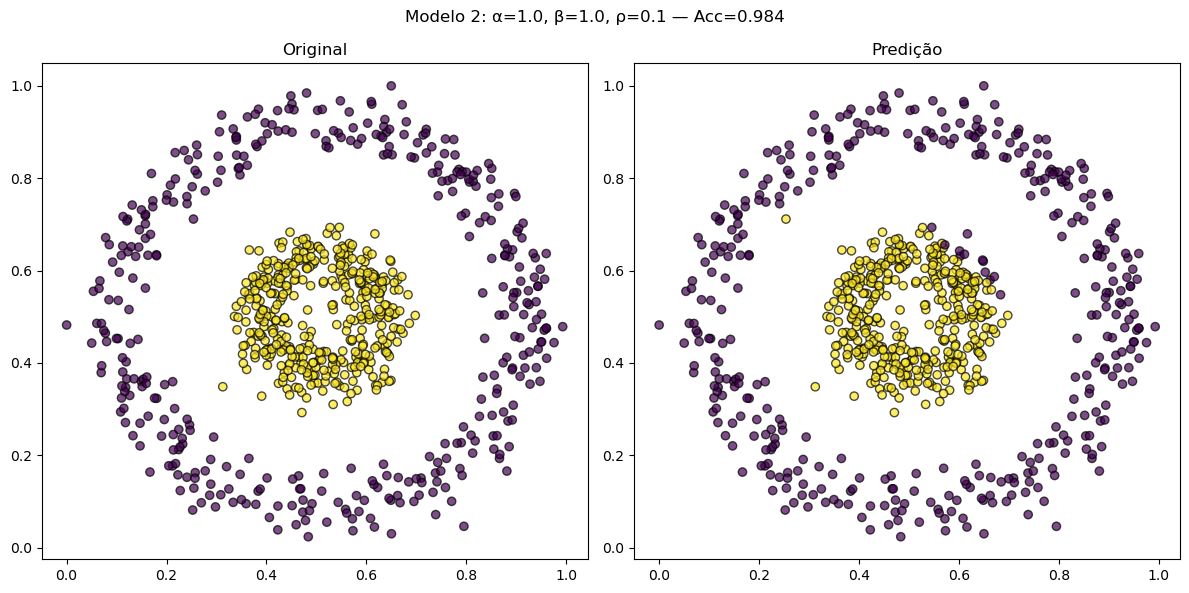

0.98375


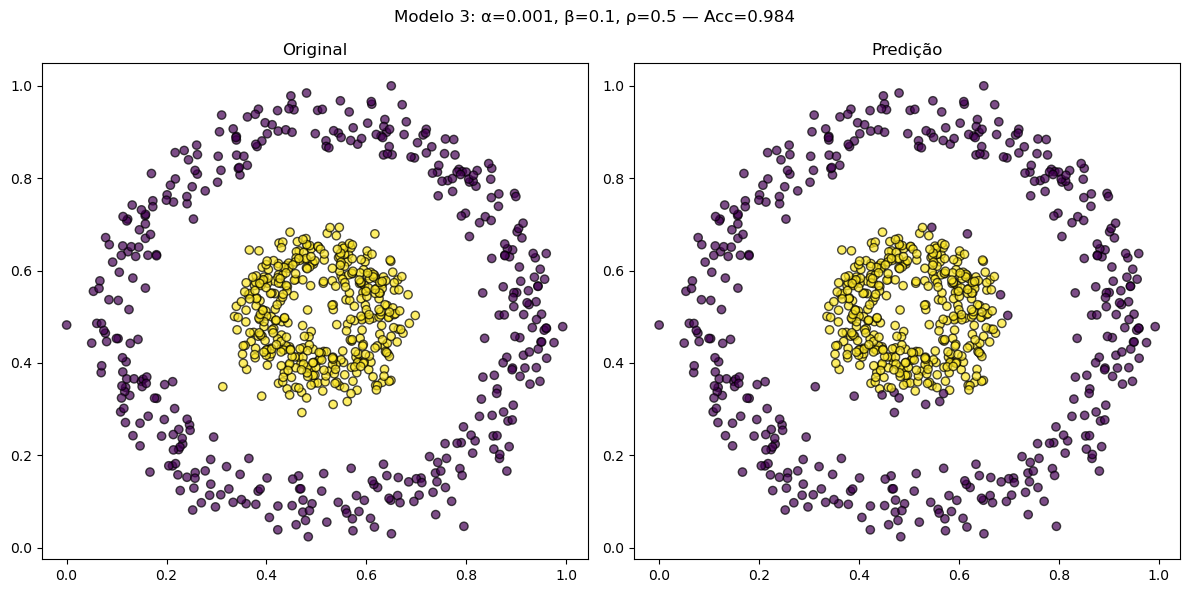

In [ ]:
for i in range(0, 3):
    values = worst_results.iloc[i]
    model = FuzzyARTMAP(rho=values['rho'], alpha=values['alpha'], beta=values['beta'])

    print(values['accuracy'])

    lower_bound, upper_bound = (model.module_a).find_data_bounds(X)
    model.module_a.set_data_bounds(lower_bound, upper_bound)

    # Preparar os dados (normalizados internamente pelo modelo)
    train_X_prep = model.prepare_data(X_train)
    test_X_prep  = model.prepare_data(X_test)

    # Treinar
    model.fit(train_X_prep, y_train)

    # Prever
    predictions = model.predict(test_X_prep)

    f, subplots = plt.subplots(1, 2, figsize=(12, 6))

    subplots[0].scatter(
        test_X_prep[:, 0],
        test_X_prep[:, 1],  # coordenadas x e y
        c=y_test,  # cor de acordo com a classe (0 ou 1)
        edgecolors="k",  # contorno preto em cada ponto
        alpha=0.7,
    )
    subplots[0].set_title("Original")
    
    subplots[1].scatter(
        test_X_prep[:, 0],
        test_X_prep[:, 1],  # coordenadas x e y
        c=predictions,  # cor de acordo com a classe (0 ou 1)
        edgecolors="k",  # contorno preto em cada ponto
        alpha=0.7,
    )
    subplots[1].set_title("Predição")

    f.suptitle(f"Modelo {i+1}: α={values['alpha']}, β={values['beta']}, ρ={values['rho']} — Acc={values['accuracy']:.3f}",
                 fontsize=12)
    plt.tight_layout()
    plt.show()